In [70]:
import numpy as np
from implementations import *
from helpers import *
from Additional_Functions import compute_mse

#code here
y, txTemp, txTestTemp, idsTest = load_data()

tx = build_poly(txTemp,1)
txTest = build_poly(txTestTemp,1)

#remember to output prediction
"""Least squares prediction:"""
w_ls, mse = least_squares(y, tx)
generetate_csv_prediction(idsTest, w_ls, txTest, "testSub_least_squares.csv")
print(mse)

w_init = np.zeros(w_ls.shape)

"""Gradien descent prediction. Got gamma with the help of cross validation, see additional functions"""
w_GD, mse = least_squares_GD(y, tx, w_init, 10, 2.395026619987486e-07)
generetate_csv_prediction(idsTest, w_GD, txTest, "testSub_Gradient_Descent.csv")
print(mse)

"""Ridge regresion prediction, lambda decided in same way as gamma above"""
w_RR, mse = ridge_regression(y, tx, 3.290344562312671e-06)
generetate_csv_prediction(idsTest, w_RR, txTest, "testSub_Ridge_Regression.csv")
print(mse)

"""Stochastic gradient descent prediction. Decided to use similar gamma as in gradient descent"""
w_SGD, mse, log_loss = least_squares_SGD(np.squeeze(np.asarray(y)), tx, np.squeeze(np.asarray(w_init)), 500, 5.994842503189421e-10)
generetate_csv_prediction(idsTest, w_SGD, txTest, "testSub_Stochastic_Gradient_Descent.csv")
print(mse)
print(log_loss)
print("---")

"""Logistic regression prediction. Got gamma with the help of cross validation, see additional functions"""
w_LR, log_loss = logistic_regression(y, tx, w_init, 10, 1e-15)
mse = compute_mse(y, tx, w_LR)
generetate_csv_prediction(idsTest, w_LR, txTest, "testSub_Logistic_Regression.csv")
print(mse)
print(log_loss)

"""Regularized logistic regression prediction. Got lambda from cross validation and used same gamma as in logistic regression"""
w_RLR, log_loss = reg_logistic_regression(y, tx, 1e5, w_init, 10, 1e-15)
mse = compute_mse(y, tx, w_RLR)
generetate_csv_prediction(idsTest, w_RLR, txTest, "testSub_Regularized_Logistic_Regression.csv")
print(mse)
print(log_loss)

"""The best test result we got"""
tx1 = build_poly(txTemp,5)
txTest1 = build_poly(txTestTemp,5)
w_Best, mse = ridge_regression(y, tx1, 0.11)
generetate_csv_prediction(idsTest, w_Best, txTest1, "testSub_Best.csv")
print(mse)

[[0.0848614]]
[[0.12137072]]
[[0.0848617]]


ValueError: not enough values to unpack (expected 3, got 2)

C:\Users\Ferdi\AppData\Local\Temp/ipykernel_39468/1307350728.py:51: RuntimeWarning: invalid value encountered in sqrt
  loss_tr = np.sqrt(2 * compute_mse(train_y, train_x , weights))
C:\Users\Ferdi\AppData\Local\Temp/ipykernel_39468/1307350728.py:52: RuntimeWarning: invalid value encountered in sqrt
  loss_te = np.sqrt(2 * compute_mse(test_y, test_x , weights))


0
100000000000000000


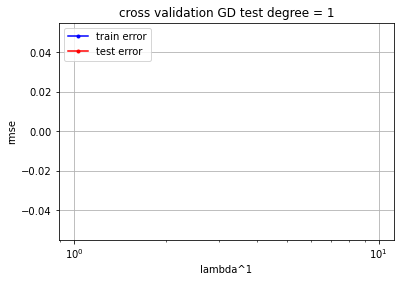

In [106]:
def calculate_log_loss(y, tx, w):
    """compute the loss: negative log likelihood."""
    txw = (tx @ w)
    yxw = y * txw
    return (np.log(1 + np.exp(txw)) - yxw).sum()

def cross_validation_visualization(lambds, mse_tr, mse_te,name,degree):
    """visualization the curves of mse_tr and mse_te."""
    plt.semilogx    (lambds, mse_tr, marker=".", color='b', label='train error')
    plt.semilogx(lambds, mse_te, marker=".", color='r', label='test error')
    plt.xlabel("lambda^%s"%degree)
    plt.ylabel("rmse")
  
    plt.title("cross validation "+name)
    plt.legend(loc=2)
    plt.grid(True)
    plt.savefig("CD_"+name)

def cross_validation(y, tx, degree):
    #w_init, mse = least_squares(y, tx)
    w_init = np.zeros((tx.shape[1],1))
    #gradient descent -15 to -6.5 gives good overview gamma = 3.727593720314938e-07 with degree 5
    #logistic gradeint diverges after around -14 graph until 13.8 gives good overview -14 good with rmse
    lambdas = np.logspace(-9, -8.7, 3)
    rmse_te = []
    rmse_tr = []
    min_loss1 = 100000000000000000
    min_lambda = 0
    for lambda_ in lambdas:
        k_indices = build_k_indices(y,4,1)
        tr = []
        te = []
        
        for k in range(len(k_indices)):

            #make a mask to extract all test data
            mask = np.zeros(tx.shape[0], dtype=bool)
            mask[k_indices[k]] = True

            test_x = tx[mask,...]
            test_y = y[mask]
        
            amask = np.invert(mask)
            train_x = tx[amask,...]
            train_y = y[amask]
            
            weights, loss, loss2 = least_squares_SGD(y, tx, w_init, 100, lambda_)

            # calculate the loss for train and test data:
            """rmse loss"""
            loss_tr = np.sqrt(2 * compute_mse(train_y, train_x , weights))
            loss_te = np.sqrt(2 * compute_mse(test_y, test_x , weights))
        
            """logistic loss"""
            
            #loss_tr = calculate_log_loss(train_y, train_x, weights)
            #loss_te = calculate_log_loss(test_y, test_x, weights)
            """predictive loss"""
            #e = train_y - predict_labels(weights,train_x)
            #loss_tr = np.sqrt(1/len(e)*e.T @ e)
            #e = test_y - predict_labels(weights,test_x)
            #loss_te = np.sqrt(1/len(e)*e.T @ e)
            tr.append(loss_tr)
            te.append(loss_te)

        rmse_tr.append(np.array(tr).mean())
        rmse_te.append(np.array(te).mean())
        
        
        if(rmse_te[-1]<min_loss1):
            min_lambda = lambda_
            min_loss1 = rmse_te[-1]
        
            
    degreeStr = str(1)
    cross_validation_visualization(lambdas, rmse_tr, rmse_te, 'GD test degree = %s' % degree, degreeStr)
    print(min_lambda)
    print(min_loss1)
    
cross_validation(y, tx, 1)
#.

In [72]:
def least_squares_SGD(y, tx, initial_w, max_iters, gamma):
    w = initial_w

    for i in range(max_iters):

        #setup for computing gradient
        gradient = np.empty(tx.shape[1])

        #Using 1 as batch size
        for minibatch_y, minibatch_tx in batch_iter(y, tx, 1):
            """Compute a gradient from just few examples n and their corresponding y_n labels."""
            #using derivative of mse
            eff = (w * minibatch_tx).sum(axis=1)
            e = minibatch_y - eff
            
            #make vector of e vector times sequenced columns of tx (because of the different derivatives sequence one tx each)
            for j in range(minibatch_tx.shape[1]):
                gradient[j] = (-(e * minibatch_tx[:,j]) * (1/(minibatch_tx.shape[0]))).sum()

            #update weight by gradient
            w = w - gamma * gradient
    log_loss = (np.log(1 + np.exp(tx @ w)) - y*(tx @ w)).sum()
    mse = compute_mse(y, tx, w)

    return w, mse, log_loss

In [85]:
"""Stochastic gradient descent prediction. Decided to use similar gamma as in gradient descent"""
w_SGD, mse, log_loss = least_squares_SGD(np.squeeze(np.asarray(y)), tx, np.squeeze(np.asarray(w_init)), 500, 2.005026619987486e-07)
generetate_csv_prediction(idsTest, w_SGD, txTest, "testSub_Stochastic_Gradient_Descent.csv")
print(mse)
print(log_loss)
print("---")

0.17802939989636413
166035.25527634544
---


In [110]:
"""Stochastic gradient descent prediction. Decided to use similar gamma as in gradient descent"""
w_SGD, mse, log_loss = least_squares_SGD(np.squeeze(np.asarray(y)), tx, np.squeeze(np.asarray(w_init)), 1000, 1.5e-08)
generetate_csv_prediction(idsTest, w_SGD, txTest, "testSub_Stochastic_Gradient_Descent.csv")
print(mse)
print(log_loss)
print("---")

0.11377155495926186
177397.77392646036
---


In [113]:
"""Stochastic gradient descent prediction. Decided to use similar gamma as in gradient descent"""
w_SGD, mse, log_loss = least_squares_SGD(np.squeeze(np.asarray(y)), tx, np.squeeze(np.asarray(w_init)), 800, 2.11e-08)
generetate_csv_prediction(idsTest, w_SGD, txTest, "testSub_Stochastic_Gradient_Descent.csv")
print(mse)
print(log_loss)
#171101

0.11671748388094622
194759.99511429627


In [26]:
import numpy as np
from implementations import *
from helpers import *
from Additional_Functions import compute_mse

#code here
y, txTemp, txTestTemp, idsTest = load_data()

tx = build_poly(txTemp,1)
txTest = build_poly(txTestTemp,1)

In [27]:
#remember to output prediction
"""Least squares prediction:"""
w_ls, mse = least_squares(y, tx)
generetate_csv_prediction(idsTest, w_ls, txTest, "testSub_least_squares.csv")
print(mse)

[[0.0848614]]


In [28]:
w_init = np.zeros(w_ls.shape)

In [29]:
"""Gradien descent prediction. Got gamma with the help of cross validation, see additional functions"""
w_GD, mse = least_squares_GD(y, tx, w_init, 25, 2.395026619987486e-07)
generetate_csv_prediction(idsTest, w_GD, txTest, "testSub_Gradient_Descent.csv")
print(mse)

[[0.10964683]]


In [30]:
"""Ridge regresion prediction, lambda decided in same way as gamma above"""
w_RR, mse = ridge_regression(y, tx, 3.290344562312671e-06)
generetate_csv_prediction(idsTest, w_RR, txTest, "testSub_Ridge_Regression.csv")
print(mse)

[[0.0848617]]


In [31]:
"""Stochastic gradient descent prediction. Decided to use similar gamma as in gradient descent"""
w_SGD, mse = least_squares_SGD(np.squeeze(np.asarray(y)), tx, np.squeeze(np.asarray(w_init)), 25, 2.395026619987486e-07)
generetate_csv_prediction(idsTest, w_SGD, txTest, "testSub_Stochastic_Gradient_Descent.csv")
print(mse)

2.0063169703503623


In [32]:
"""Logistic regression prediction. Got gamma with the help of cross validation, see additional functions"""
w_LR, log_loss = logistic_regression(y, tx, w_init, 25, 1e-15)
mse = compute_mse(y, tx, w_LR)
generetate_csv_prediction(idsTest, w_LR, txTest, "testSub_Logistic_Regression.csv")
print(mse)
print(log_loss)

[[0.17279901]]
173012.8326703143


In [33]:
"""Regularized logistic regression prediction. Got lambda from cross validation and used same gamma as in logistic regression"""
w_RLR, log_loss = reg_logistic_regression(y, tx, 1e5, w_init, 25, 1e-15)
mse = compute_mse(y, tx, w_RLR)
generetate_csv_prediction(idsTest, w_RLR, txTest, "testSub_Regularized_Logistic_Regression.csv")
print(mse)
print(log_loss)

[[0.17279901]]
173013.22204008835


In [34]:
"""The best test result we got"""
tx1 = build_poly(txTemp,5)
txTest1 = build_poly(txTestTemp,5)
w_Best, mse = ridge_regression(y, tx1, 0.11)
generetate_csv_prediction(idsTest, w_Best, txTest1, "testSub_Best.csv")
print(mse)

[[0.07881887]]
